# Fig 4.18

Continuation diagram

See also [BifurcationKit.jl](https://github.com/bifurcationkit/BifurcationKit.jl)

In [1]:
using DifferentialEquations
using ModelingToolkit
using Plots
Plots.default(linewidth=2)

Model

In [2]:
@independent_variables t
@variables A(t) B(t)
@parameters k1 k2 k3 k4 k5 n
D = Differential(t)

eqs = [
    D(A) ~ k1 / (1 + B^n) - (k3 + k5) * A,
    D(B) ~ k2 + k5 * A - k4 * B
]
@mtkbuild osys = ODESystem(eqs, t)
ps = Dict(k1 => 0, k2 => 5, k3 => 5, k4 => 5, k5 => 2, n => 4)
alg = DynamicSS(Rodas5P())
prob = SteadyStateProblem(osys, [0.0, 0.0], ps)

function ainf(k1val)
    sol = solve(remake(prob, p=[k1 => k1val]), alg)
    return sol.u[1]
end

ainf (generic function with 1 method)

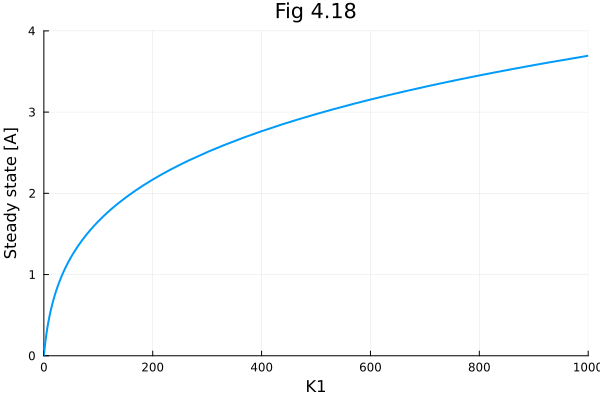

In [3]:
plot(
    ainf, 0., 1000.,
    title = "Fig 4.18",
    xlabel = "K1" , ylabel= "Steady state [A]",
    legend=nothing, ylim=(0, 4), xlim=(0, 1000)
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*